### Treść zadania

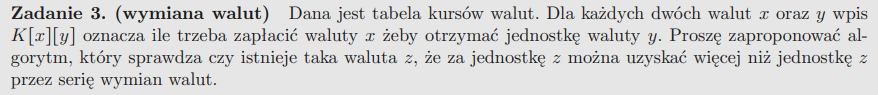

### Omówienie algorytmu

Ponieważ mamy powiedziane, że dla każdych dwóch walut jest wpis w tablicy $ K $, graf wymiany walut będzie grafem pełnym. Z tego powodu użyjemy algorytmu Floyda-Warshalla zamiast Bellmana-Forda, ponieważ jest on lepiej przystosowany do pracy na macierzy (w zasadzie, to poznana implementacja Floyda-Warshalla wymaga grafu w postaci macierzowej). Zadanie sprowadza się do zauważenia pewnej zależności, która ułatwi nam znacznie rozwiązanie. Zamiast mnożenia kursów walut, co wiązało by się z ciągłym powiększaniem niedokładności wyniku, dużo lepiej wykorzystać własności logarytmów, a mianowicie: $ log(a \cdot b) = log(a) + log(b) $. Ponieważ nam nie zależy na znalezieniu dokładnego mnożnika, który będzie symbolizował nasz zysk z jednego cyklu wymiany, a jedynie na zachowaniu trendu funkcji (funkcja rosnąca), możemy bezpośrednio w grafie pozamieniać wagi krawędzi na logarytm o dowolnej większej od $ 1 $ podstawie (np. logarytm o podstawie $ 2 $ lub $ e $) i wtedy nie musimy już modyfikować sposobu relaksacji w algorytmie Floyda-Warshalla, ponieważ wówczas dodawanie wag krawędzi zamiast mnożenia będzie tym, co musimy zrobić (patrz logarytmy). Warto sobie jeszcze zdać sprawę, kiedy tak naprawdę zarobimy. Tablica kursów wymiany jest zdefiniowana w taki sposób, że podczas wymiany waluty $ x $ na $ y $ płacimy $ K[x][y] $ waluty $ x $ za jednostkę waluty $ y $. Oznacza to tyle, że otrzymamy finalnie $ n = \frac{1}{K[x][y]} \cdot m $ waluty $ y $, gdzie $ m $ jest ilością wymienianej waluty $ x $, a $ n $ ilością orzymanej waluty $ y $. Chcemy znaleźć taką sekwencję wymian, że $ n = \frac{1}{K[x_1][x_2]} \cdot \frac{1}{K[x_2][x_3]} \cdot ... \cdot \frac{1}{K[x_n][x_1]} \cdot m = \frac{m}{K[x_1][x_2] \cdot K[x_2][x_3] \cdot ... \cdot K[x_n][x_1]} > m $, czyli po kolejnych wymianach walut ($ x_1 \rightarrow x_2 \rightarrow ... \rightarrow x_n $), wyjdziemy na plus. Jeżeli podzielimy obie strony nierówności przez $ m $ i przemnożymy przez mianownik, otrzymujemy: $ K[x_1][x_2] \cdot K[x_2][x_3] \cdot ... \cdot K[x_n][x_1] < 1 $. Ponieważ funkcja logarytmiczna zachowuje monotoniczność funkcji logaarytmowanej, po obustronnym zlogarytmowaniu nierówności (logarytmem o podstawie większej od 1), otrzymamy: <br>
$ K[x_1][x_2] \cdot K[x_2][x_3] \cdot ... \cdot K[x_n][x_1] < 1 $ <br>
$ log(K[x_1][x_2] \cdot K[x_2][x_3] \cdot ... \cdot K[x_n][x_1]) < 0 $ <br>
$ log(K[x_1][x_2]) + log(K[x_2][x_3]) + ... + log(K[x_n][x_1]) < 0 $ <br>
Wniosek jest taki, że po przekształceniu wag krawędzi na logarytmy, szukamy takiego cyklu, że suma wag krawędzi jest ujemna. Zatem od razu po zamianie wag na logarytmy możemy zastosować algorytm Floyda-Warshalla i, jeżeli znajdziemy ujemny cykl, to istnieje można po ciągu wymian uzyskać więcej waluty $ x $ niż miało się na początku.

### Złożoność

###### Obliczeniowa:
$ O(V^3) $
###### Pamięciowa:
$ O(V^2) $

### Implementacja

In [1]:
import copy
import math


def create_graph(K):
    n = 0
    for e in K:
        n = max(n, e[0], e[1])
    n += 1
    
    G = [[0] * n for _ in range(n)]
    for e in K:
        G[e[0]][e[1]] = math.log(e[2])
    return G


def floyd_warshall(G: 'graph represented by adjacency matrix'):
    n = len(G)
    inf = float('inf')
    
    # Create a copy of a graph as we have to have lengths
    # of edges stored at the beginning of an algorithm
    W = copy.deepcopy(G)
    
    for t in range(n):
        for i in range(n):
            for j in range(n):
                if W[i][t] + W[t][j] < W[i][j]:
                    W[i][j] = W[i][t] + W[t][j]
                    
    # Detect negative cycles (the same approach as in the
    # Bellman-Ford's algoritm)
    for t in range(n):
        for i in range(n):
            for j in range(n):
                if W[i][t] + W[t][j] < W[i][j]:
                    W[i][j] = -inf
                
    return W


def can_rise(K):
    G = create_graph(K)
    W = floyd_warshall(G)
    n = len(G)
    for i in range(n):
        for j in range(n):
            if W[i][j] == float('-inf'):
                return True
    return False

###### Kilka testów

In [2]:
PLN = 0; EUR = 1; USD = 2; YEN = 3;

K = [(PLN, EUR, 4.51), (PLN, USD, 3.68), (PLN, YEN, 0.034),
     (EUR, PLN, 0.22), (EUR, USD, 0.82), (EUR, YEN, 0.0075),
     (USD, PLN, 0.27), (USD, EUR, 1.22), (USD, YEN, 0.0091),
     (YEN, PLN, 29.83), (YEN, EUR, 133,47), (YEN, USD, 109.62)]

can_rise(K)

True